# Importing Libraries

In [1]:
# Numpy
import numpy as np

#Pandas
import pandas as pd

#Matplotlib
import matplotlib.pyplot as plt

#Seaborn
import seaborn as sns

#Beautiful soup
from bs4 import BeautifulSoup

#Request
import requests

#RegEx
import re

# Web Scraping

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films'
req = requests.get(url)

In [3]:
req

<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Academy Award–winning films - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vecto

In [5]:
arr = []
for i in soup.findAll('td'):
    arr.append(str(i))

arr[0]

'<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>'

In [6]:
# The | is used to match multiple patterns the 1st pattern is checked then the secod and so on
re.sub('^<td>.*">|<.*>|\n',"",arr[20])

'Avatar: The Way of Water'

In [7]:
film=[]
year=[]
award=[]
nominations=[]
counter = 0

for i in arr:
    i = re.sub('^<td>.*">*|<td>|</td>|<.*>|\n|',"",i)
    match counter:
        case 0:
            film.append(i)
            counter+=1
        case 1:
            if i!='':
                year.append(int(i))
                counter+=1
        case 2:
            i = re.sub('[0,"("]|[")"]',"",i)
            award.append(i)
            counter+=1
        case 3:
            i = re.sub('^["["]|]',"",i)
            nominations.append(int(i))
            counter=0

In [8]:
print(len(film),len(year),len(award),len(nominations))

1361 1360 1360 1360


In [9]:
year[1359]

1964

In [10]:
film[1359]

'Zorba the Greek'

In [11]:
Oscar = pd.DataFrame({'Films':film[:1360],'Year':year[:1360],'Award':award[:1360],'Nominations':nominations[:1360]})
Oscar

,Films,Year,Award,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
1355,The Yankee Doodle Mouse,1943,1,1
1356,The Yearling,1946,2,7
1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,You Can't Take It with You,1938,2,7


In [12]:
Oscar.tail()

,Films,Year,Award,Nominations
1355,The Yankee Doodle Mouse,1943,1,1
1356,The Yearling,1946,2,7
1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,You Can't Take It with You,1938,2,7
1359,Zorba the Greek,1964,3,7


In [13]:
Oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Films        1360 non-null   object
 1   Year         1360 non-null   int64 
 2   Award        1360 non-null   object
 3   Nominations  1360 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 42.6+ KB


<h1>FIFA Dataset Analysis (Web Scrapping)</h1>

In [14]:
#Sending request to the site
count = 0
url = f'https://sofifa.com/players?offset={count}'

#Modifying headers to not get identified as a crawler
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

#Trial request test to check the status
req = requests.get('https://sofifa.com/players?offset=0',headers=HEADERS)

In [15]:
#Checking the status code 
req

<Response [200]>

In [16]:
#Looping the requests and soup to scrape multiple pages
soup = ''
arr=[]
while count<10:
    req = requests.get(url,headers=HEADERS)
    soup = BeautifulSoup(req.content)
    for i in soup.findAll('td'):
        arr.append(i)
    count+=1

In [17]:
# Cleaning the scrapped data using regx and creating list of each column
image_link = []
name=[]
position=[]
age =[]
OVA =[]
POT=[]
team =[]
duration = []
value = []
wage = []
total_stats = []
count = 0

for i in arr:
    if count == 0:
        image_link.append(re.sub('<img.*data-src="|".*','',str(i.find('img'))))
        count+=1
    elif count == 1:
        name.append(re.sub('<a.*?>|</a>|<em.*?>.*</em>','',str(i.find('a'))))
        position.append(re.sub('<span.*?>|</span>|["["]|]','',str(i.findAll('span'))))
        count+=1
    elif count == 2:
        age.append(re.sub('<td.*?>|</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    elif count == 3:
        OVA.append(re.sub('<td.*?>|</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    elif count == 4:
        POT.append(re.sub('<td.*?>|</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    elif count == 5:
        team.append(re.sub('<a.*?>|</a>','',str(i.find('a'))))
        duration.append(re.sub('<div.*?>|\n|</div>|<em.*?>.*</em>','',str(i.find('div',{'class':'sub'}))))
        count+=1
    elif count ==6:
        value.append(re.sub('<td.*?>€|M|</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    elif count ==7:
        wage.append(re.sub('<td.*?>€|.</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    elif count==8:
        total_stats.append(re.sub('<td.*?>|</td>|<em.*?>|</em>|<div>.*</div>','',str(i)))
        count+=1
    else:
        count=0

In [18]:
#Checking the number of items in each column list
print(len(image_link),len(name),len(position),len(age),len(OVA),len(POT),len(team),len(duration),len(value),len(wage),len(total_stats))

600 600 600 600 600 600 600 600 600 600 600


In [19]:
#Creating DataFrame using the lists created from the cleaning of scrapped data.
FC_df = pd.DataFrame({'Img_link':image_link,'Name':name,'Position':position,'Age':age,'Overall':OVA,'Potential':POT,'Team':team,'Duration':duration,'Value':value,'Wage':wage,'Total_stats':total_stats})
FC_df

,Img_link,Name,Position,Age,Overall,Potential,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/271/579/24_60.png,F. Terracciano,"RB, RM, LB",20,72,83,Milan,2024 ~ 2028,4.9,24,1953
1,https://cdn.sofifa.net/players/270/964/24_60.png,J. Bellingham,"CM, CAM, ST",17,66,82,Sunderland,2023 ~ 2028,2.1,1,1784
2,https://cdn.sofifa.net/players/270/673/24_60.png,W. Zaïre-Emery,"CM, CDM",17,79,90,Paris Saint Germain,2022 ~ 2025,36,10,2102
3,https://cdn.sofifa.net/players/235/790/24_60.png,K. Havertz,"CAM, CM, ST",24,82,87,Arsenal,2023 ~ 2028,46,110,2044
4,https://cdn.sofifa.net/players/237/681/24_60.png,T. Kubo,"RW, ST, RM",22,81,87,Real Sociedad,2022 ~ 2027,41.5,40,1972
...,...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.net/players/241/187/24_60.png,L. Geertruida,"RB, CB",22,79,84,Feyenoord,2017 ~ 2025,25,17,1971
596,https://cdn.sofifa.net/players/241/486/24_60.png,J. Koundé,"CB, RB",24,85,89,FC Barcelona,2022 ~ 2027,69.5,160,1959
597,https://cdn.sofifa.net/players/241/637/24_60.png,A. Tchouaméni,"CDM, CM, CB",23,84,89,Real Madrid,2022 ~ 2028,58.5,160,2151
598,https://cdn.sofifa.net/players/245/367/24_60.png,X. Simons,"CAM, LW, RW",20,82,89,RB Leipzig,"Jun 30, 2024",60.5,71,2139


In [20]:
# typecasting 
FC_df['Age'] = pd.to_numeric(FC_df['Age'])
FC_df['Overall'] = pd.to_numeric(FC_df['Overall'])
FC_df['Potential'] = pd.to_numeric(FC_df['Potential'])
FC_df['Value'] = pd.to_numeric(FC_df['Value'])
FC_df['Wage'] = pd.to_numeric(FC_df['Wage'])
FC_df['Total_stats'] = pd.to_numeric(FC_df['Total_stats'])

In [21]:
# Retriveing the dataset information such as columns datatype, isnull, etc.
FC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Img_link     600 non-null    object 
 1   Name         600 non-null    object 
 2   Position     600 non-null    object 
 3   Age          600 non-null    int64  
 4   Overall      600 non-null    int64  
 5   Potential    600 non-null    int64  
 6   Team         600 non-null    object 
 7   Duration     600 non-null    object 
 8   Value        600 non-null    float64
 9   Wage         590 non-null    float64
 10  Total_stats  600 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 51.7+ KB


In [22]:
#Removing columns - 'Img_link' & 'Duration'
FC_df.drop(['Img_link','Duration'],axis=1,inplace=True)

In [23]:
FC_df

,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_stats
0,F. Terracciano,"RB, RM, LB",20,72,83,Milan,4.9,24.0,1953
1,J. Bellingham,"CM, CAM, ST",17,66,82,Sunderland,2.1,1.0,1784
2,W. Zaïre-Emery,"CM, CDM",17,79,90,Paris Saint Germain,36.0,10.0,2102
3,K. Havertz,"CAM, CM, ST",24,82,87,Arsenal,46.0,110.0,2044
4,T. Kubo,"RW, ST, RM",22,81,87,Real Sociedad,41.5,40.0,1972
...,...,...,...,...,...,...,...,...,...
595,L. Geertruida,"RB, CB",22,79,84,Feyenoord,25.0,17.0,1971
596,J. Koundé,"CB, RB",24,85,89,FC Barcelona,69.5,160.0,1959
597,A. Tchouaméni,"CDM, CM, CB",23,84,89,Real Madrid,58.5,160.0,2151
598,X. Simons,"CAM, LW, RW",20,82,89,RB Leipzig,60.5,71.0,2139


In [24]:
#Fetching the first 20 rows from the dataset
FC_df.head(20)

,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_stats
0,F. Terracciano,"RB, RM, LB",20,72,83,Milan,4.9,24.0,1953
1,J. Bellingham,"CM, CAM, ST",17,66,82,Sunderland,2.1,1.0,1784
2,W. Zaïre-Emery,"CM, CDM",17,79,90,Paris Saint Germain,36.0,10.0,2102
3,K. Havertz,"CAM, CM, ST",24,82,87,Arsenal,46.0,110.0,2044
4,T. Kubo,"RW, ST, RM",22,81,87,Real Sociedad,41.5,40.0,1972
5,Vitor Roque,"ST, RW, LW",18,76,88,FC Barcelona,17.5,44.0,1824
6,V. Osimhen,ST,24,88,91,Napoli,126.5,120.0,2063
7,J. Zirkzee,ST,22,75,84,Bologna,12.5,28.0,1807
8,Palhinha,"CDM, CM",27,84,85,Fulham,43.0,110.0,2100
9,T. Almada,"CAM, CM, CF",22,80,88,Atlanta United,47.5,11.0,2058


In [25]:
#Fetching the last 10 rows from the dataset
FC_df.tail(10)

,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_stats
590,K. Mainoo,"CDM, CM",18,67,87,Manchester United,2.7,8.0,1842
591,Y. Moukoko,ST,18,77,87,Borussia Dortmund,22.5,18.0,1857
592,E. Camavinga,"CDM, CM, LB",20,82,89,Real Madrid,56.5,110.0,2171
593,B. Šeško,ST,20,76,85,RB Leipzig,16.5,36.0,1882
594,António Silva,CB,19,78,88,Benfica,28.5,8.0,1774
595,L. Geertruida,"RB, CB",22,79,84,Feyenoord,25.0,17.0,1971
596,J. Koundé,"CB, RB",24,85,89,FC Barcelona,69.5,160.0,1959
597,A. Tchouaméni,"CDM, CM, CB",23,84,89,Real Madrid,58.5,160.0,2151
598,X. Simons,"CAM, LW, RW",20,82,89,RB Leipzig,60.5,71.0,2139
599,M. Caicedo,"CDM, CM",21,79,85,Chelsea,26.0,67.0,2011


In [26]:
# Fetching the information regarding the numerical columns in the dataset
FC_df.describe()

,Age,Overall,Potential,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,590.000000,600.000000
mean,21.333333,78.816667,86.833333,37.805000,63.949153,1980.716667
std,3.583801,5.306913,2.831770,36.196364,60.931207,140.865568
min,17.000000,66.000000,77.000000,0.000000,1.000000,1729.000000
25%,19.000000,75.000000,85.000000,13.250000,19.000000,1863.000000
50%,21.000000,79.000000,87.000000,28.500000,42.000000,1959.500000
75%,23.000000,82.250000,88.000000,46.125000,95.000000,2091.250000
max,38.000000,91.000000,94.000000,185.000000,340.000000,2295.000000


In [27]:
#Checking the number of duplicated values
FC_df.duplicated().sum()

540

In [28]:
#Droping duplicate values
FC_df.drop_duplicates(inplace=True)

In [29]:
FC_df

,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_stats
0,F. Terracciano,"RB, RM, LB",20,72,83,Milan,4.9,24.0,1953
1,J. Bellingham,"CM, CAM, ST",17,66,82,Sunderland,2.1,1.0,1784
2,W. Zaïre-Emery,"CM, CDM",17,79,90,Paris Saint Germain,36.0,10.0,2102
3,K. Havertz,"CAM, CM, ST",24,82,87,Arsenal,46.0,110.0,2044
4,T. Kubo,"RW, ST, RM",22,81,87,Real Sociedad,41.5,40.0,1972
5,Vitor Roque,"ST, RW, LW",18,76,88,FC Barcelona,17.5,44.0,1824
6,V. Osimhen,ST,24,88,91,Napoli,126.5,120.0,2063
7,J. Zirkzee,ST,22,75,84,Bologna,12.5,28.0,1807
8,Palhinha,"CDM, CM",27,84,85,Fulham,43.0,110.0,2100
9,T. Almada,"CAM, CM, CF",22,80,88,Atlanta United,47.5,11.0,2058


<h1>EDA</h1>

1. Find the name of the player who has the highest wage

In [30]:
FC_df[FC_df["Wage"]==FC_df['Wage'].max()][['Name']]

,Name
48,E. Haaland


<h3>Conclusion</h3>
<p>From the above we can concude that <em>E. Haaland</em> has the highest wage among the players that we have in our dataset.</p>

2. Find the youngest and the oldest player

In [31]:
#Oldest players
FC_df[FC_df['Age']==FC_df['Age'].max()][['Name','Age']]

,Name,Age
46,Cristiano Ronaldo,38


In [32]:
#Youngest players
FC_df[FC_df['Age']==FC_df['Age'].min()][['Name','Age']]

,Name,Age
1,J. Bellingham,17
2,W. Zaïre-Emery,17
10,R. Bardghji,17
16,S. Pafundi,17
24,J. Hato,17


<h3>Conclusion</h3>
<p>From the above we can conlcude that the oldest player is <em>Cristiano Ronaldo <b>age - 38</b></em> and the youngest players are <em>J. Bellingham,  	W. Zaïre-Emery, S. Pafundi, J. Hato, and R. Bardghji. <b>age - 17</b> in our dataset.</em></p>

3. List out the top 10 players according to their potential

In [33]:
#Sorting according to potential
FC_df.sort_values('Potential',ascending=False)[['Name']].head(10)

,Name
48,E. Haaland
33,J. Musiala
17,K. Kvaratskhelia
11,J. Bellingham
6,V. Osimhen
27,R. Araujo
2,W. Zaïre-Emery
50,E. Camavinga
28,Gabri Veiga
39,I. Bennacer


<h3>Conclusion</h3>
<p>From the above we conclude that <em>E. Haaland</em> has the highest potential in our given dataset.</p>

4. Create a new dataframe using the columns Name and Potential

In [34]:
new_df = FC_df[['Name','Potential']]
new_df

,Name,Potential
0,F. Terracciano,83
1,J. Bellingham,82
2,W. Zaïre-Emery,90
3,K. Havertz,87
4,T. Kubo,87
5,Vitor Roque,88
6,V. Osimhen,91
7,J. Zirkzee,84
8,Palhinha,85
9,T. Almada,88


5. Plot a graph players_name v/s potential

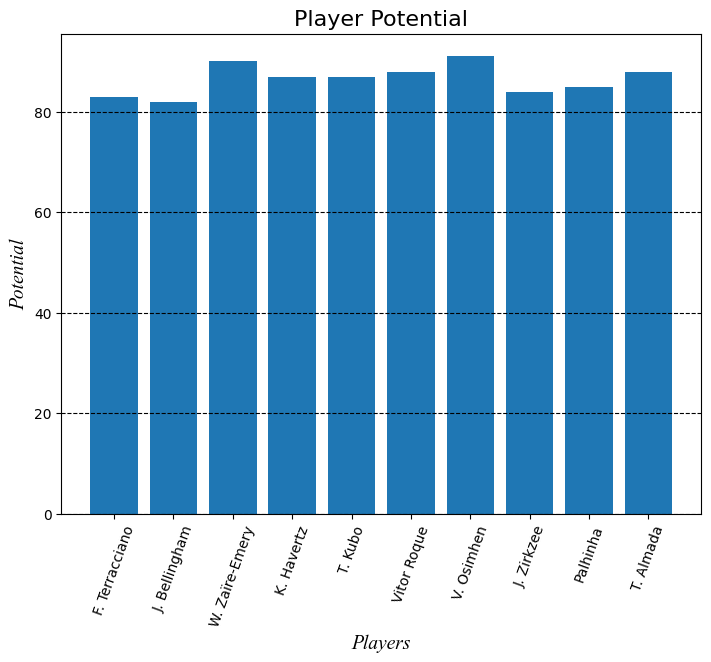

In [35]:
fig = plt.figure()
axs = fig.add_axes([0.5,0.5,1,1])
axs.bar(FC_df['Name'].head(10),FC_df['Potential'].head(10))
plt.xticks(FC_df['Name'].head(10),rotation=70,size=10)
axs.set_xlabel('Players',fontsize=14,fontstyle='oblique',family='Times New Roman')
axs.set_ylabel('Potential',fontsize=14,fontstyle='oblique',family='Times New Roman')
axs.set_title('Player Potential',size=16)
axs.grid(axis='y',ls='--',color='k')
plt.show()

<h3>Conclusion</h3>
<p>From the above graph we can conclude that among the players in the graph <em>V. Osimhen</em> has the highest potential</p>

5. Plot a graph for players (Top 10) v/s wage

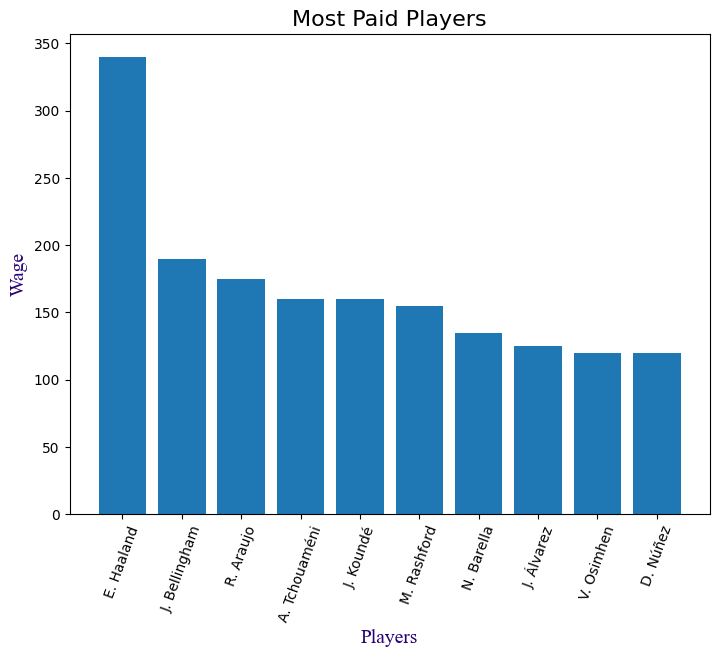

In [36]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1,1])
x = FC_df.sort_values('Wage',ascending=False).head(10)['Name']
y = FC_df.sort_values('Wage',ascending=False).head(10)['Wage']
ax.bar(x,y)
ax.set_title('Most Paid Players',size=16)
ax.set_xlabel('Players',size=14,family='Times New Roman',color='#280274')
ax.set_ylabel('Wage',size=14,family='Times New Roman',color='#280274')
plt.xticks(rotation=70)
plt.show()

<h3>Conclusion</h3>
<p>From the graph above we can conclude that player <em>E Haaland</em> has the highest wage.</p>

6. Find all the players whoes potential is more than or equal to 90

In [37]:
FC_df[FC_df['Potential']>=90][['Name']]

,Name
2,W. Zaïre-Emery
6,V. Osimhen
11,J. Bellingham
17,K. Kvaratskhelia
27,R. Araujo
33,J. Musiala
48,E. Haaland


7. Find all the players whoes potential is more than 90 and the age <= 20

In [38]:
FC_df[(FC_df['Potential']>90) & (FC_df['Age']<=20)][['Name','Potential','Age']]

,Name,Potential,Age
11,J. Bellingham,92,20
33,J. Musiala,93,20


<h3>Conclusion</h3>
<p>From the above result we conclude that players <em>Bellingham & Musiala</em> at the age of 20 have a above 90 high potential.</p>

8. Find all the players whoes values > 10 but wage <50

In [39]:
FC_df[(FC_df['Value']<10) & (FC_df['Wage']<50)][['Name','Value','Wage']]

,Name,Value,Wage
0,F. Terracciano,4.9,24.0
1,J. Bellingham,2.1,1.0
10,R. Bardghji,3.6,3.0
15,R. Lavia,7.0,32.0
21,V. Barco,7.0,6.0
26,Fresneda,5.0,2.0
37,G. Rutter,9.5,30.0
53,K. Mainoo,2.7,8.0


9. Plot the correlation for the FC_df dataset.

In [40]:
FC_df[['Age','Overall','Potential','Value','Wage','Total_stats']].corr()

,Age,Overall,Potential,Value,Wage,Total_stats
Age,1.000000,0.600111,-0.173824,0.253737,0.372524,0.464182
Overall,0.600111,1.000000,0.522306,0.832718,0.708425,0.720962
Potential,-0.173824,0.522306,1.000000,0.720267,0.495369,0.323351
Value,0.253737,0.832718,0.720267,1.000000,0.785943,0.591057
Wage,0.372524,0.708425,0.495369,0.785943,1.000000,0.571640
Total_stats,0.464182,0.720962,0.323351,0.591057,0.571640,1.000000


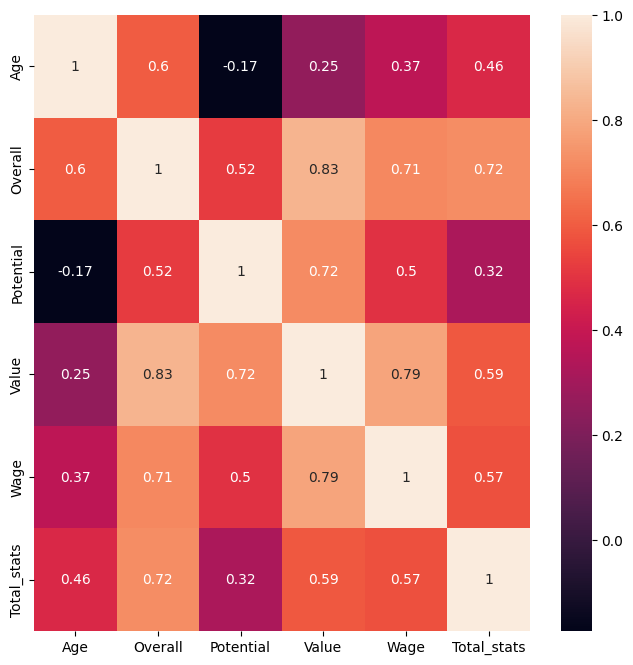

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(FC_df[['Age','Overall','Potential','Value','Wage','Total_stats']].corr(),annot=True)
plt.show()

<h3>Conclusion</h3>
<p>From the above heatmap we can understand the impact a particular column has on other columns. High negative correlation is represented by dark black color while a high positive correlation value of 1 is represented by a light skin color.</p>